In [45]:
import pymol
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import sympy
from pymol import cmd
import pickle
from ired import gen_cov,block_ired
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [3]:
filename = '/Users/chengminghe/Dropbox/research/ubq/md/ubiquitin/3ons_1000ns/snapshots/3ons_1000ns_{}.pdb'
objname = '3ons_1000ns_{}'
atom1_c = 'n'
atom2_c = 'c'
length_c = 72
shift_c=True
cov_ensemble_nc = []
for i in tqdm(range(1000)):
    cov_ensemble_nc.append(gen_cov(filename.format(i),objname.format(i),atom1_c,atom2_c,length_c,shift=shift_c)[1])

  0%|                                                  | 0/1000 [00:00<?, ?it/s]

 PyMOL not running, entering library mode (experimental)


100%|███████████████████████████████████████| 1000/1000 [03:42<00:00,  4.50it/s]


In [5]:
filename = '/Users/chengminghe/Dropbox/research/ubq/md/ubiquitin/3ons_1000ns/snapshots/3ons_1000ns_{}.pdb'
objname = '3ons_1000ns_{}'
atom1_ca = 'n'
atom2_ca = 'ca'
length_ca = 73
shift_ca=False
cov_ensemble_nca = []
for i in tqdm(range(1000)):
    cov_ensemble_nca.append(gen_cov(filename.format(i),objname.format(i),atom1_ca,atom2_ca,length_ca,shift=shift_ca)[1])

100%|███████████████████████████████████████| 1000/1000 [03:42<00:00,  4.50it/s]


In [6]:
def block_ired_sep(cov_ensemble,block_size,index,total_time=1000,M=0):
    i = 0
    kappa = []
    while i+block_size <= total_time:
        kappa_tmp =[]
        angle = np.array(cov_ensemble[i:i+block_size]).mean(axis=0)
        w, v = la.eig(angle)
        for m in range(len(index)):
#             print(v[:,m].T @ v[:,m])
            kappak=[]
            kappak.append(1/len(index)*np.exp(-(v[:,m]**2 * np.log(v[:,m]**2)).sum()))
            kappa_tmp.append(kappak)
        kappa.append(kappa_tmp) 
        i += block_size
    return np.array(kappa).mean(axis=2)

In [35]:
# angle = np.array(cov_ensemble_nc).mean(axis=0)
# w, v = la.eig(angle)
# np.exp(-(v[:,1]**2 * np.log(v[:,1]**2)).sum())/68

# i=0
# index = gen_cov(filename.format(i),objname.format(i),atom1,atom2,length,shift=shift)[0]
# block= [10,20,50,100,200,500]
# kappa = block_ired_sep(cov_ensemble_nc,block[-2],index,total_time=1000,M=0)[0]
# w

# plt.scatter(np.log(w),kappa)
# plt.xlabel('$log(\lambda)$')
# plt.ylabel('$\kappa$')

# i=0
# index = gen_cov(filename.format(i),objname.format(i),atom1,atom2,length,shift=shift)[0]
# block_size= 100
# s2_avg,s2,err = block_ired(cov_ensemble_nc,block_size,index,total_time=1000,M=5)

# plt.errorbar(index+1,s2_avg,yerr=err)
# plt.ylim(0,1)
# i=0
# index = gen_cov(filename.format(i),objname.format(i),atom1,atom2,length,shift=shift)[0]
# block= [10,20,50,100,200,500]
# s2_list = [block_ired(cov_ensemble_nc,block_size,index,total_time=1000,M=5)[0] for block_size in block]
# err_list = [block_ired(cov_ensemble_nc,block_size,index,total_time=1000,M=5)[2] for block_size in block]

# data = {
#     '3ons_1000ns_nc_var_block':(block,s2_list,err_list)
# }
# with open("3ons_1000ns_nc_var_block", "wb") as f:
#     pickle.dump(data, f)

# NC

In [33]:
i=0
index_c = gen_cov(filename.format(i),objname.format(i),atom1_c,atom2_c,length_c,shift=shift_c)[0]
block= [10,20,50,100,200,500]
s2_c_list = [block_ired(cov_ensemble_nc,block_size,index_c,total_time=1000,M=5)[0] for block_size in block]
err_c_list = [block_ired(cov_ensemble_nc,block_size,index_c,total_time=1000,M=5)[2] for block_size in block]

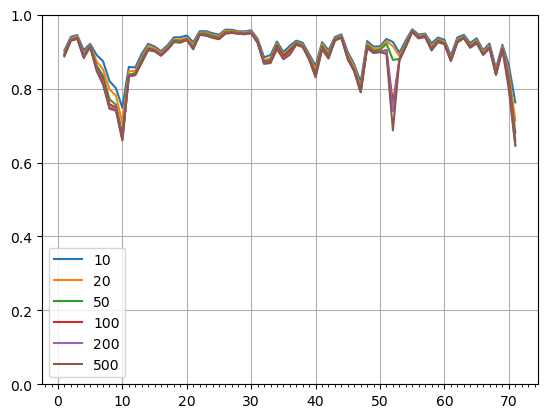

In [38]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots()
for i,s2 in enumerate(s2_c_list):
    ax.plot(index_c+1,s2,label=block[i])
ax.set_ylim(0.0,1.0)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.legend()
ax.grid()

# NCA

In [39]:
i=0
index_ca = gen_cov(filename.format(i),objname.format(i),atom1_ca,atom2_ca,length_ca,shift=shift_ca)[0]
block= [10,20,50,100,200,500]
s2_ca_list = [block_ired(cov_ensemble_nca,block_size,index_ca,total_time=1000,M=5)[0] for block_size in block]
err_ca_list = [block_ired(cov_ensemble_nca,block_size,index_ca,total_time=1000,M=5)[2] for block_size in block]

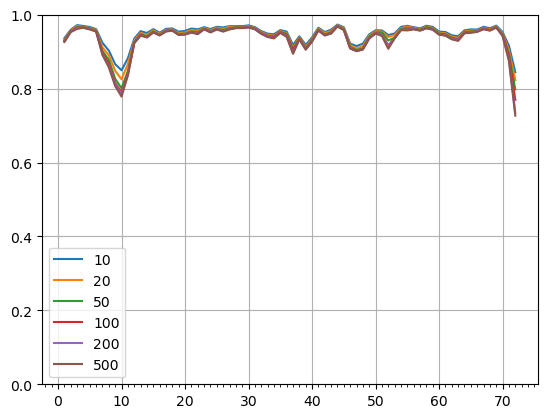

In [40]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots()
for i,s2 in enumerate(s2_ca_list):
    ax.plot(index_ca+1,s2,label=block[i])
ax.set_ylim(0.0,1.0)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.legend()
ax.grid()

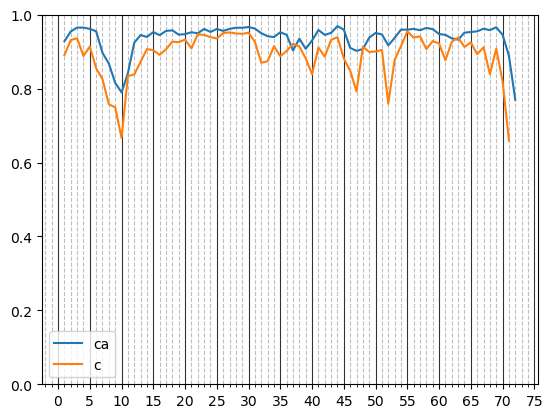

In [53]:
fig, ax = plt.subplots()

# Plotting data
ax.plot(index_ca + 1, s2_ca_list[3], label='ca')
ax.plot(index_c + 1, s2_c_list[3], label='c')

# Setting y-axis limits
ax.set_ylim(0.0, 1.0)

# Configuring x-axis ticks
ax.xaxis.set_major_locator(MultipleLocator(5))  # Major ticks every 5 units
ax.xaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks every 1 unit

# Adding grid
ax.grid(which='major', axis='x', linestyle='-', color='black', alpha=0.8)  # Solid grid for major ticks
ax.grid(which='minor', axis='x', linestyle='--', color='gray', alpha=0.5)  # Dashed grid for minor ticks

# Adding legend
ax.legend()

plt.show()


In [49]:
print(s2_ca_list[3].mean(),s2_c_list[3].mean())

0.9371892753893982 0.8911232824880518


In [51]:
992.438*0.9371892753893982

930.1022500889036

In [52]:
1284.6*0.8911232824880518

1144.7369686841514

In [ ]:
with open("cov_ensemble_nh_tip4p", "wb") as f:
    pickle.dump(cov_ensemble_nh, f)

In [27]:
i=0
pymol.cmd.delete('all')
pymol.cmd.load('/Users/chengminghe/Dropbox/research/ubq/md/ubiquitin/3ons_1000ns/snapshots/3ons_1000ns_{}.pdb'.format(i), '3ons_1000ns_{}'.format(i))
c = pymol.cmd.get_coords('resi * and pol. and name c', 1)
n = pymol.cmd.get_coords('resi * and pol. and name n', 1)
print(len(n))

72


In [72]:
pymol.cmd.delete('all')
pymol.cmd.load('/Users/chengminghe/Dropbox/research/ubq/md/ubiquitin/3ons_tip4p_1000ns/snapshots/3ons_1000ns_{}.pdb'.format(i), '3ons_1000ns_{}'.format(i))
c = pymol.cmd.get_coords('resi * and pol. and name n', 1)
len(c)

72

In [22]:
from tqdm import tqdm
angle_list = []
for i in tqdm(range(1000)):
    pymol.cmd.delete('all')
    pymol.cmd.load('/Users/chengminghe/Dropbox/research/ubq/md/ubiquitin/3ons_tip4p_1000ns/snapshots/3ons_1000ns_{}.pdb'.format(i), '3ons_1000ns_{}'.format(i))
    c = pymol.cmd.get_coords('resi * and pol. and name c', 1)
    n = pymol.cmd.get_coords('resi * and pol. and name n', 1)
    nc = (n[1:]-c[:-1])
    nc_norm = la.norm(nc,axis=1).reshape((len(nc),-1)) 
    cos = (nc @ nc.T) / (nc_norm @ nc_norm.T)
    np.fill_diagonal(cos,1)
    angle_list.append(0.5*(3*cos**2-1))

100%|███████████████████████████████████████| 1000/1000 [00:40<00:00, 24.46it/s]


In [68]:
angle_list = np.array(angle_list)
len(angle_list)

1000

In [3]:
block = [5,10,25,50,100,125,250,500,1000]
# block = [250,500]
s2_list = []
for b in tqdm(block):
    m = 5
    s2 = []
    i = 0
    while i+b <= 1000:
        s2_tmp = []
        angle = np.array(angle_list[i:i+b]).mean(axis=0)
        w, v = la.eig(angle)
#         for j in range(71):
#             idx = np.zeros((len(nc),1))
#             idx[j] = 1
#             r = v[:,m:].T @ angle @ idx
#             s2_tmp.append(1-abs(r.T @ np.diag(w[m:]) @ r)[0,0])
            
#         s2_tmp = 1 - v[:,m:].T @ np.diag(w[m:]) @ v[:,m:].T
        for k in range(71):
            sk = []
            for m in range(5,71):
                sk.append(w[m]*v[k,m]**2)
            s2_tmp.append(1-sum(sk))

        s2.append(s2_tmp) 
        i += b
    s2 = np.array(s2).mean(axis=0)
    s2_list.append(s2)

100%|█████████████████████████████████████████████| 9/9 [00:11<00:00,  1.33s/it]


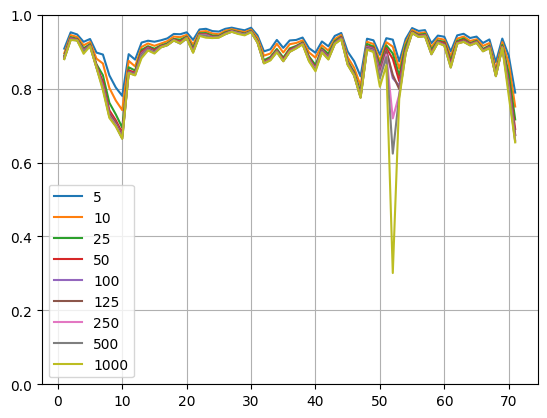

In [7]:
for i,s2 in enumerate(s2_list):
    plt.plot(np.arange(1,72),s2,label=block[i])
plt.ylim(0.0,1.0)
plt.legend()
plt.grid()

In [45]:
len(s2_list[0])

710

(array([  6.,  34.,  91., 199., 262., 213., 118.,  46.,  20.,  11.]),
 array([0.65019161, 0.74371684, 0.83724213, 0.93076736, 1.02429259,
        1.11781788, 1.21134305, 1.30486834, 1.39839363, 1.4919188 ,
        1.58544409]),
 <BarContainer object of 10 artists>)

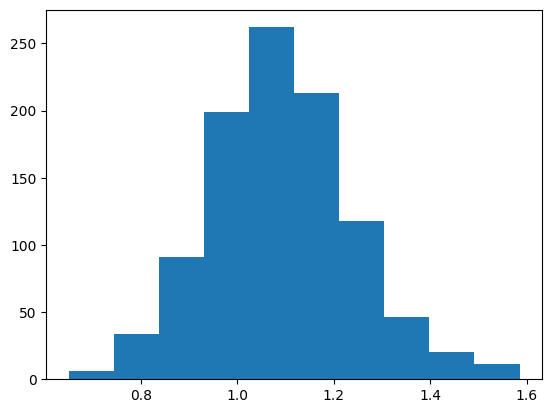

In [124]:
plt.hist(angle_list[:,1,2])

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']